<h1><center><span style="color:#369;padding: 10px 30px 10px 30px;border: 3px solid #369;border-radius:7px;">implémentation d'un graphe </span></center></h1>

Plusieurs façon d'implémenter les graphes **non orientés** peuvent être utilisée. Nous allons en voir deux :
- avec un dictionnaire
- avec la matrice d'adjacence

Dans tous les cas, nous chercherons à implémenter les méthodes suivantes :



In [1]:
# Import de graphviz pour l'affichage des graphes.
from graphviz import Graph
import basthon

## Implémentation avec un dictionnaire

<div class="alert alert-warning" role="alert">
        
## Exercice 1
Compléter la classe `Graphe` ci-dessous. Les clés seront les sommets du graphe et leur valeur sera la liste des sommets adjacents.
    
Attention, comme le graphe n'est pas orienté, si A et B sont adjacents, il faudra faire une arête de A vers B et aussi de B vers A.
</div>

In [2]:
class Graphe:
    def __init__(self):
        """constructeur"""
        self.precedence={}
        
    def ajouter_sommet(self,s):
        """ajoute un sommet"""
        if s not in self.precedence:
            self.precedence[s]=[]
            
    def ajouter_arc(self, s1, s2,poids):
        """Ajoute les sommets s1 dans s2 et s2 dans s1"""
        if s1 not in self.precedence:
            self.ajouter_sommet(s1)
        if s2 not in self.precedence:
            self.ajouter_sommet(s2) 
        

        self.precedence[s1].append((poids,s2))        
        self.precedence[s2].append((poids,s1))
        
        
    def arc(self,s1,s2):
        """Renvoie True si il y a un arc entre s1 et s2"""
        return s2 in self.precedence[s1]
    
    def sommets(self):
        """Renvoie la liste de tous les sommets"""
        return list(self.precedence.keys())
    
    def voisins(self,s):
        """Renvoie la liste des voisins de s"""
        return list(self.precedence[s])
        
    def afficher(self): 
        "Affichage du graphe en utilisant le module networkx"
        dot = Graph('G')
        for s1 in self.sommets():
            for s2 in self.voisins(s1): 
                # Condition pour éviter les doubles arêtes
                if '{} -- {}'.format(s2[1],s1) not in dot.source:
                    dot.edge(s1,s2[1])
        basthon.display(dot)

In [3]:
# Exemple

g = Graphe()
g.ajouter_sommet('A')
g.ajouter_arc('A','B',1)
g.ajouter_arc('A','C',2)
g.ajouter_arc('B','F',3)
g.ajouter_arc('B','D',2)
g.ajouter_arc('C','D',3)
g.ajouter_arc('C','E',4)
g.ajouter_arc('D','F',3)
g.ajouter_arc('D','G',3)
g.ajouter_arc('D','E',2)
g.ajouter_arc('E','G',5)
g.ajouter_arc('G','F',4)


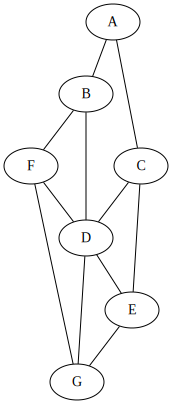

In [4]:
g.afficher()

<div class="alert alert-warning" role="alert">
    
## Exercice 2
Utilisez la classe précédente pour 
    Ecrire la fonction « parcours_profondeur(G, d, visité) » qui fait le parcours en profondeur du graphe G passé en paramètre à partir du sommet de départ d.
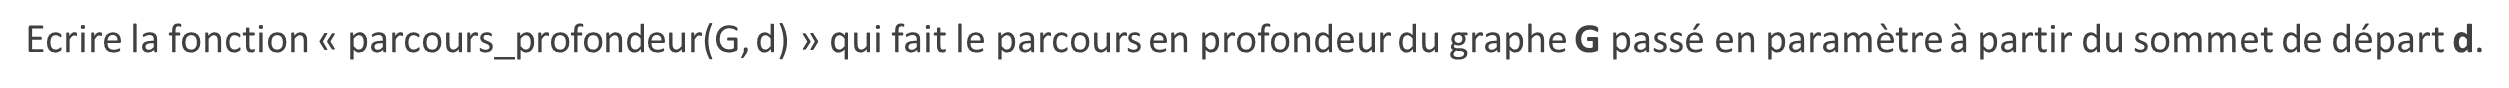
    
    Le résultat du parcours en profondeur du graphe en dessus à partir de A sera : A, B, F ,G ,D, E, C


In [5]:
def  parcours_profondeur(G, d, visité):
    """  """
        
    visité.append(d)
    voisins = G.voisins(d)
    
    for poids, v in voisins : 
        if v not in visité :
            parcours_profondeur(G, v, visité)

    

    
    
    

In [6]:
L=[]
print(parcours_profondeur(g,'A',L))
print(L)

None
['A', 'B', 'F', 'D', 'C', 'E', 'G']


<div class="alert alert-warning" role="alert">
    
## Exercice 3
Ecrire des fonctions qui permettent :

1. d'afficher le nombre de sommets d'un graphe passé en paramètre
2. d'afficher le nombre d'arêtes d'un graphe passé en paramètre
3. le degré d'un sommet passé en paramètre
4. le sommet de plus haut degré et le degré d'un graphe passé en paramètre
    
</div>

In [7]:
# Votre code ici :
# Question 1.

# Question 2.


# Question 3.


# Question 4.



## Implémentation sous forme de matrice d'adjacence

<div class="alert alert-warning" role="alert">
    
## Exercice 4
Compléter la classe `Graphe` ci-dessous. 
    On utilisera une matrice d'adjacence pour stocker les arêtes entre les différents sommets.  
    La taille de la matrice sera spécifiée lors de la création du graphe via le paramètre `n`  
    Les sommets sont accessible par leur indice (de 0 à n-1)
    
Attention, comme le graphe n'est pas orienté, si A et B sont adjacents, il faudra faire une arête de A vers B et aussi de B vers A.
</div>

In [8]:
class Graphe:    
    def __init__(self,n : int):
        self.n = n 
        self.adj = [[False]*n for _ in range(n)]
        
    def ajouter_arc(self, s1, s2):
        pass
        
    def arc(self,s1,s2):
        pass
    
    def voisins(self, s):
        pass
    
    def afficher(self): 
        "Affichage du graphe en utilisant le module networkx"
        dot = Graph('G')
        for s1 in range(self.n):
            for s2 in self.voisins(s1): 
                # Condition pour éviter les doubles arêtes
                if '{} -- {}'.format(s2,s1) not in dot.source:
                    # dot.edge n'accepte que le type ste
                    dot.edge(str(s1),str(s2))        
        basthon.display(dot)

In [9]:
# Exemple
g = Graphe(4)
g.ajouter_arc(0,1)
g.ajouter_arc(0,3)
g.ajouter_arc(1,2)
g.ajouter_arc(3,1)


In [10]:
g.afficher()

Traceback (most recent call last):
  File "<basthon-input-10-ad08831c8b22>", line 1, in <module>
    g.afficher()
  File "<basthon-input-8-5747cd4110ed>", line 19, in afficher
    for s2 in self.voisins(s1):
TypeError: 'NoneType' object is not iterable


## Bonus : modifier ces classes pour des graphes orientés

Avec le dictionnaire

In [11]:
from graphviz import Digraph

class Graphe:
    def __init__(self):
        pass
        
    def ajouter_sommet(self,s):
        pass
            
    def ajouter_arc(self, s1, s2):
        pass
        
    def arc(self,s1,s2):
        pass
    
    def sommets(self):
        pass
    
    def voisins(self,s):
        pass
    
    def afficher(self): 
        "Affichage du graphe en utilisant le module graphviz"
        dot = Digraph('G')
        for s1 in self.sommets():
            for s2 in self.voisins(s1):
                dot.edge(s1,s2)        
        basthon.display(dot)

In [12]:
# Exemple
g = Graphe()
g.ajouter_arc("A","B")
g.ajouter_arc("A","D")
g.ajouter_arc("B","C")
g.ajouter_arc("D","B")

print("Sommets du graphe:",g.sommets())
print("Voisins de A:",g.voisins("A"))
print("Voisins de B:",g.voisins("B"))

Sommets du graphe: None
Voisins de A: None
Voisins de B: None


In [13]:
g.afficher()

Traceback (most recent call last):
  File "<basthon-input-13-5e6b1cab2743>", line 1, in <module>
    g.afficher()
  File "<basthon-input-11-e1f7c92a720f>", line 25, in afficher
    for s1 in self.sommets():
TypeError: 'NoneType' object is not iterable


Avec la matrice d'adjacence :

In [14]:
class Graphe:    
    def __init__(self,n : int):
        pass
        
    def ajouter_arc(self, s1, s2):
        pass
        
    def arc(self,s1,s2):
        pass
    
    def voisins(self, s):
        pass
    
    def afficher(self): 
        "Affichage du graphe en utilisant le module networkx"
        dot = Digraph('G')
        for s1 in range(self.n):
            for s2 in self.voisins(s1):
                dot.edge(str(s1),str(s2))
        basthon.display(dot)

In [15]:
# Exemple
g = Graphe(4)
g.ajouter_arc(0,1)
g.ajouter_arc(0,3)
g.ajouter_arc(1,2)
g.ajouter_arc(3,1)


In [16]:
g.afficher()

Traceback (most recent call last):
  File "<basthon-input-16-c40bde9564bf>", line 1, in <module>
    g.afficher()
  File "<basthon-input-14-8ae86acb4f57>", line 17, in afficher
    for s1 in range(self.n):
                    ^^^^^^
AttributeError: 'Graphe' object has no attribute 'n'
